# This  notebook demonstrates a basic free energy model in the theory of magnetism. Here we simulate the stonier model.

In [1]:
from __future__ import division

#import pims

#import pandas as pd

import math as math

import scipy

from scipy.signal import *


import numpy as np

from scipy.misc import *

import matplotlib.pyplot as plt

from scipy import fft

from scipy import interpolate

import matplotlib.pyplot as plt
from scipy.optimize import fmin
from scipy.optimize import fmin_powell
from scipy.optimize import fminbound
from scipy.optimize import fmin_l_bfgs_b
#import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


This model begins by constructing the free energy of the system given by
$$F=K_{1}\sin^{2}(\theta-\phi)-HM_{s}\cos(\theta)$$.$\theta$ follows the orientiation of the magnetization with respect to the x-axis and $\phi$ tracks the angle the easy axis makes with the x-axis. By defining the reduced field as
$$h=\frac{M_{s}}{2K_{1}}H$$ the energy becomes $$f=\frac{1}{2}\sin^{2}(\theta -\phi)-h\cos\theta$$

In [138]:
#Here I make an array for various values of H and phi. This is Step 1 in code.pdf
H_vals=np.linspace(-40,40,40)
h=[0.151*i for i in H_vals ]
h=np.array(h)
phi_vals=np.linspace(0,360,40)


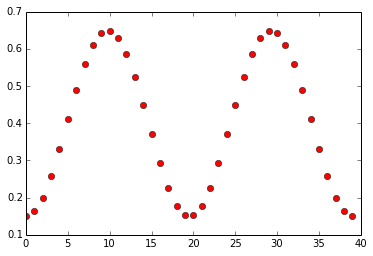

In [139]:
#For the steps(1-6) please see page 30 to 31 of the attached pdf (code.pdf)
#Here I define my energy free energy. This is Step 2 in code.pdf

def calculate_free_energy(phi, theta):
    h = 0.15
    #pdb.set_trace()
    free_energy = ((0.5 * (np.sin(np.radians(theta - phi)))**2) - 
                   (h * np.cos(np.radians(theta))))
    return free_energy


y = calculate_free_energy(phi_vals, 180)
plt.plot( y,'ro') 
plt.show()

In [110]:
def disk_energy(phi1,theta,h):
    #print(phi1)
    a = -2.27364*np.cos(np.radians(phi1[0] - phi1[1]))  \
    -1.98944*h*np.cos(np.radians(phi1[0] - theta))-1.13682*h*np.cos(np.radians( phi1[1] - theta))  \
    + 0.5*1.75*(np.cos(np.radians(phi1[0])))**2 + .5*0.857143*(np.cos(np.radians(phi1[1])))**2 \
    - 1.13682*(np.cos(np.radians(phi1[0])))**2 - 0.568411*(np.cos(np.radians(phi1[1])))**2 
     
    #print(phi1, a)
    return a

In [117]:
 
theta=90
#theta=45
#startPhi=np.array([[50],[50]])
startPhi=[50,50]
startPhim=np.array([50,50])
startPhi2=[200,200]
startPhi2m=np.array([180,180])

hArray=np.arange(-7,7,0.10)
#hArray=np.arange(-7,7.05,3)
hArray2=np.arange(7,-7.05,-0.1)

In [118]:
phiArrayA = []  
phiArrayB = []
phiArray2A = []
phiArray2B = []
#
for h1 in hArray:
    phi=scipy.optimize.fmin(disk_energy,startPhi,args=(theta,h1))
    #phi=fmin(disk_energy,startPhi,args=(theta,h))
    phiArrayA.append(phi[0])
    phiArrayB.append(phi[1])
    startPhi=phi

Optimization terminated successfully.
         Current function value: -24.157460
         Iterations: 68
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: -23.844834
         Iterations: 37
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: -23.532208
         Iterations: 37
         Function evaluations: 71
Optimization terminated successfully.
         Current function value: -23.219582
         Iterations: 34
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -22.906956
         Iterations: 34
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -22.594330
         Iterations: 34
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: -22.281704
         Iterations: 35
         Function evaluations: 69
Optimization termin

In [119]:
for h2 in hArray2:
    phi=scipy.optimize.fmin(disk_energy,startPhi2,args=(theta,h2))
    phiArray2A.append(phi[0])
    phiArray2B.append(phi[1])
    startPhi2=phi 

Optimization terminated successfully.
         Current function value: -24.157460
         Iterations: 53
         Function evaluations: 104
Optimization terminated successfully.
         Current function value: -23.844834
         Iterations: 39
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -23.532208
         Iterations: 39
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -23.219582
         Iterations: 37
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: -22.906956
         Iterations: 35
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: -22.594330
         Iterations: 37
         Function evaluations: 72
Optimization terminated successfully.
         Current function value: -22.281704
         Iterations: 35
         Function evaluations: 70
Optimization termin

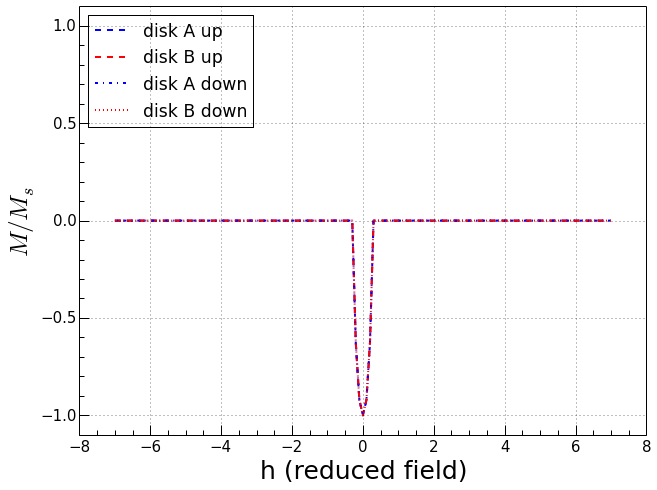

In [120]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 8.5)
ax=plt.gcf().subplots_adjust(bottom=0.20,left=0.15)
ax=plt.gca()
plt.plot(hArray,np.cos(np.radians(phiArrayA)), 'b--',label='disk A up',linewidth='2')
plt.plot(hArray,np.cos(np.radians(phiArrayB)), 'r--',label='disk B up',linewidth='2')
plt.plot(hArray2, np.cos(np.radians(phiArray2A)), '-.',label='disk A down',linewidth='2',color='blue')
plt.plot(hArray2, np.cos(np.radians(phiArray2B)), ':', label='disk B down',linewidth='2',color='red' ) 


plt.ylabel('$M/M_{s}$',fontsize=25)
plt.xlabel('h (reduced field)',fontsize=25)
plt.ylim(-1.1,1.1)
ax.minorticks_on()
ax.tick_params('both',length=10,width=1,which='major',direction='in')
ax.tick_params('both',length=5,width=1,which='minor',direction='in')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ticklines = ax.get_xticklines()
ticklines.extend( ax.get_yticklines() )
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )

for label in ticklabels:
      label.set_color('black')
      label.set_fontsize('15')
plt.grid('on')
#plt.legend(loc='upper left', numpoints=1, handlelength=0,fontsize='xx-large')
plt.legend(loc='upper left', numpoints=1,fontsize='xx-large')
plt.savefig('ferromagnetic_theta_90.png')
plt.show()

In [29]:
hArray.max(),hArray2.max(),hArray[0:3],hArray2[0:3]

(6.9499999999999496,
 7.0,
 array([-7.  , -6.95, -6.9 ]),
 array([ 7.  ,  6.95,  6.9 ]))

In [121]:
netM=(6*700* (np.cos(np.radians(np.hstack((phiArrayA,phiArray2A  ) )-theta)))+
(4*600* (np.cos(np.radians(np.hstack((phiArrayB,phiArray2B  ) )-theta)))))/(6*700+4*600)


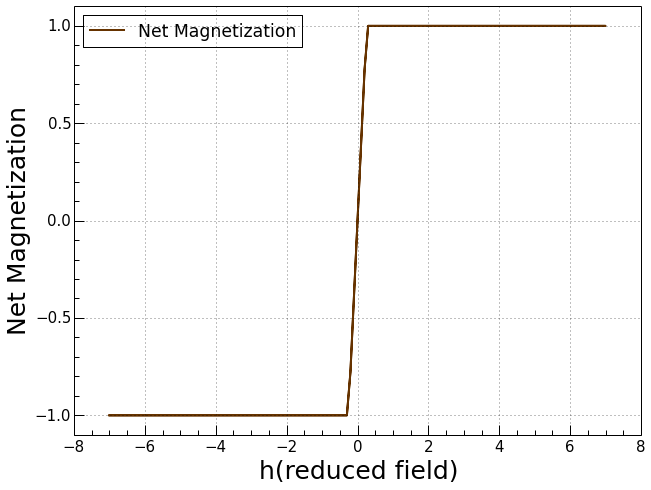

In [122]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 8.5)
ax=plt.gcf().subplots_adjust(bottom=0.20,left=0.15)
ax=plt.gca()
plt.plot(np.hstack((hArray,hArray2 )), netM,'r',label='Net Magnetization',color='#663300',linewidth='2' )
plt.ylim(-1.1,1.1)
plt.ylabel('Net Magnetization',fontsize=25)
plt.xlabel('h(reduced field)',fontsize=25)
ax.minorticks_on()
ax.tick_params('both',length=10,width=1,which='major',direction='in')
ax.tick_params('both',length=5,width=1,which='minor',direction='in')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ticklines = ax.get_xticklines()
ticklines.extend( ax.get_yticklines() )
ticklabels = ax.get_xticklabels()
ticklabels.extend( ax.get_yticklabels() )

for label in ticklabels:
      label.set_color('black')
      label.set_fontsize('15')
plt.grid('on')
plt.legend(loc='upper left', numpoints=1,fontsize='xx-large')
plt.savefig('Net_magnetization_Ferro_theta_90.png')
plt.show()


